In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X, y = data['data'], data['target']

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [19]:
def baseline_model(hidden_input):
    # create model
    model = Sequential()
    model.add(Dense(hidden_input, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
model = baseline_model
estimator = KerasClassifier(build_fn=model, epochs=20, batch_size=5, verbose=0)

In [16]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
%%time
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 69.33% (21.12%)
Wall time: 1min 10s


In [26]:
%%time
hidden_inputs = range(1, 5)
means = []
stds = []
for i in hidden_inputs:
    #model = baseline_model(hidden_input=i)
    estimator = KerasClassifier(build_fn=baseline_model, hidden_input=i, epochs=20, batch_size=5, verbose=0)
    result = cross_val_score(estimator, X, dummy_y, cv=kfold)
    means.append(result.mean()*100)
    stds.append(result.std()*100)
    print("Model with %d neurons in hidden layer: ac = %.2f%% (std = %.2f%%)" % (i, result.mean()*100, result.std()*100))

Model with 1 neurons in hidden layer: ac = 38.67% (std = 21.46%)
Model with 2 neurons in hidden layer: ac = 38.67% (std = 24.00%)
Model with 3 neurons in hidden layer: ac = 60.67% (std = 16.45%)
Model with 4 neurons in hidden layer: ac = 42.67% (std = 23.13%)
Wall time: 12min


In [28]:
import matplotlib.pyplot as plt

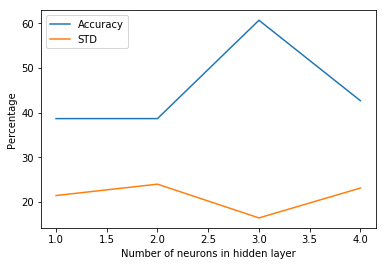

In [29]:
plt.plot(hidden_inputs, means, label='Accuracy')
plt.plot(hidden_inputs, stds, label="STD")
plt.xlabel("Number of neurons in hidden layer")
plt.ylabel("Percentage")
plt.legend()
plt.show()